## Importing of necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the data.

### About the Data:
### This data set is downloaded from kaggle. This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
### Dataset link: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

In [3]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\archive (4)\Expanded_data_with_more_features.csv', encoding = "unicode_escape")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Understanding the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

## Cleaning of the dataset.

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [10]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


# Exploratory Data Analysis on different columns.

## Gender Distributon.

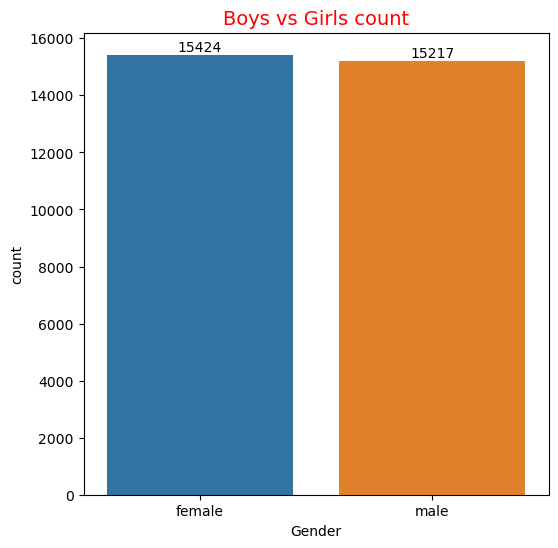

In [12]:
# Number of Boys and Girls in the school.

plt.figure(figsize =(6,6))
ax = sns.countplot(data=df, x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Boys vs Girls count", fontsize=14, color='red')
plt.show()

### From the above bar graph it can be clearly seen that the number of Girls in school is slightly more than the number of boys.

## Impact of Parent Education on Student scores.

In [13]:
# Using group by function to check for relationship between Parent education and Mean marks.

gb = df.groupby("ParentEduc").agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


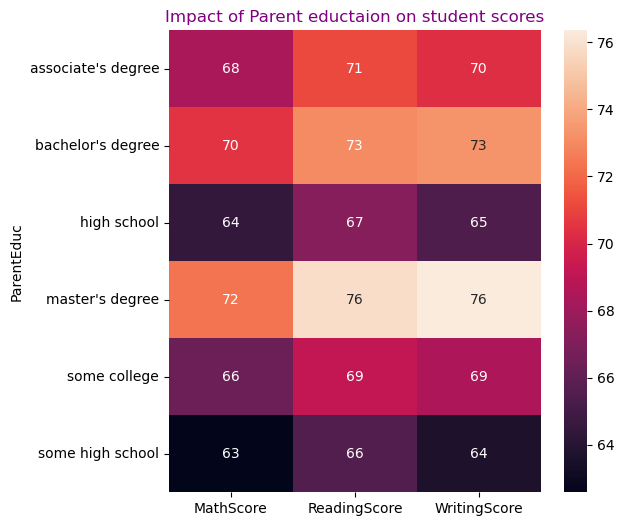

In [14]:
# Heat map for Parent education and student scores.

plt.figure(figsize =(6,6))
sns.heatmap(gb, annot=True)
plt.title("Impact of Parent eductaion on student scores", fontsize=12, color='Purple')
plt.show()

### From the heat map we can clearly conclude that there is difference seen in marks of those students whose parent have Master's degree.
### Students with Educated parents have higher marks and students with less educated parents (like some high school) have less marks.

## Impact of Parent Marital Status on Student scores.

In [15]:
# Using group by function to check for relationship between Parent marital status and Mean marks.

gb2 = df.groupby("ParentMaritalStatus").agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore':'mean'})
gb2

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


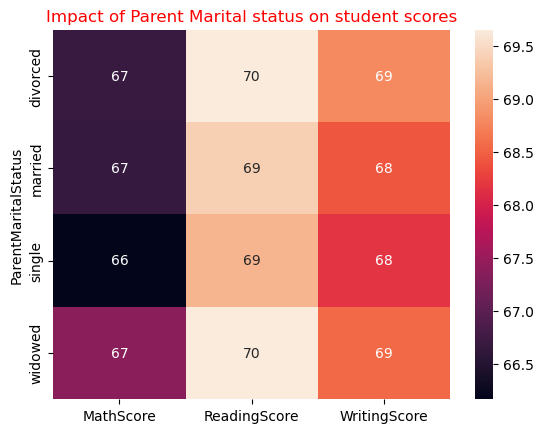

In [16]:
# Using Heat map to plot above data.

sns.heatmap(gb2, annot=True)
plt.title("Impact of Parent Marital status on student scores", fontsize=12, color='RED')
plt.show()

### From the above Heat map we can conclude that there is almost no to negligible impact of Parent's marital status on child's score.

## Impact on Student scores with whether they play sports or not.

In [17]:
gb3 = df.groupby("PracticeSport").agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore':'mean'})
gb3

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


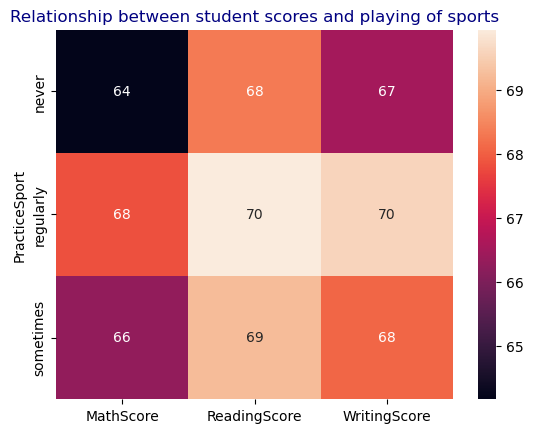

In [18]:
sns.heatmap(gb3, annot=True)
plt.title("Relationship between student scores and playing of sports", fontsize=12, color='Navy')
plt.show()

### Again there is alomost negligible impact of student playing regluar sports on thier marks scored.

## Checking for Outliers using Box Plot.

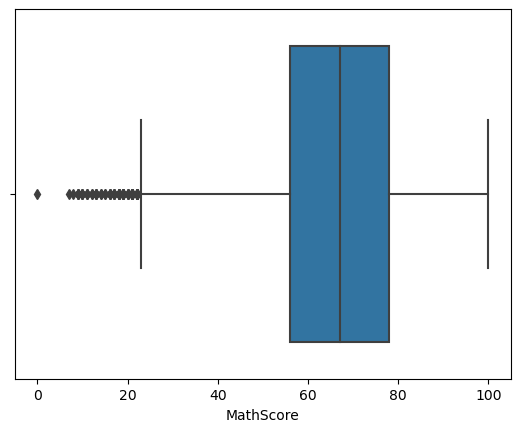

In [19]:
# Outliers in Maths score.
sns.boxplot(data=df, x='MathScore')
plt.show()

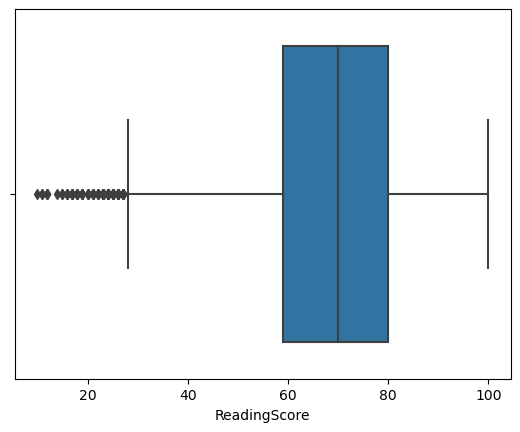

In [20]:
# Outliers in Reading Score.
sns.boxplot(data=df, x='ReadingScore')
plt.show()

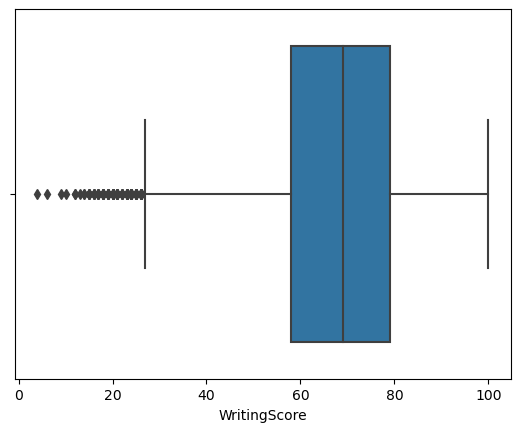

In [21]:
# Outliers in Writing score.

sns.boxplot(data=df, x='WritingScore')
plt.show()

### Certainly there are outliers in Math Score, reading score and as well as Writing score.
### Students are weak in Maths when compared to Reading and Writing.

## Distributon of Ethnic Groups.

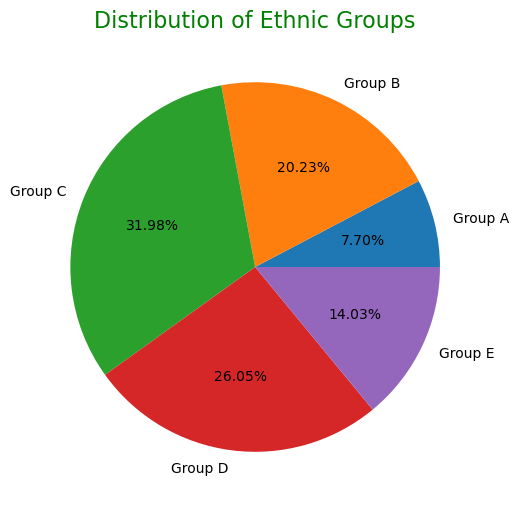

In [22]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB= df.loc[(df['EthnicGroup'] == "group B")].count()
groupC= df.loc[(df['EthnicGroup'] == "group C")].count()
groupD= df.loc[(df['EthnicGroup'] == "group D")].count()
groupE= df.loc[(df['EthnicGroup'] == "group E")].count()

plt.figure(figsize=(6,6))
l = ["Group A", "Group B", "Group C", "Group D", "Group E"]
mlist =[groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]
plt.pie(mlist, labels = l, autopct = '%1.2f%%')
plt.title("Distribution of Ethnic Groups", fontsize=16, color="Green")
plt.show()

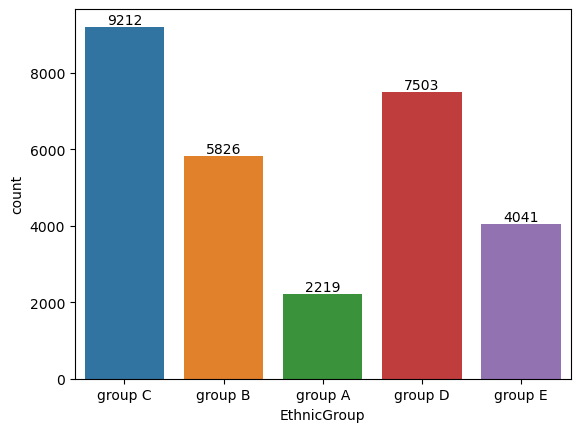

In [23]:
ax = sns.countplot(data=df, x='EthnicGroup')
for bars in ax.containers:
    ax.bar_label(bars)

### Clearly Group C has the highest number of students followed by Group D and then Group B.

## Conclusion:
### 1. Number of Boys in school is little less than number of Girls, the difference in their number is 207.
### 2. Student with Educated Parent (like Master's Degree) is more likely to have better marks then student whose parent is less educated (like some high school only).
### 3. There is almost none to negligible impact on student marks based on thier parent's marital status.
### 4. Students are found to be weak in Maths when compared to Reading and Writing scores.
### 5. No major impact was for playing regular sports seen on student marks.
### Group C has highest number of students followed by Group D and then Group B when it comes to Ethnic group distribution.